# FBProphet - CO

## Import Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/data_imputed.csv')
df.head()

,timestamp_local,temp,city_name,country_code,aqi,co,no2,o3,pm10,pm25,so2
0,2022-02-01 00:00:00,12.6,Gujrāt,PK,385.0,1339.8,76.0,10.7,491.7,347.67,238.0
1,2022-02-01 01:00:00,11.5,Gujrāt,PK,404.0,1437.6,76.0,9.3,508.3,359.33,268.0
2,2022-02-01 02:00:00,11.9,Gujrāt,PK,421.0,1535.5,76.0,8.0,525.0,371.00,298.0
3,2022-02-01 03:00:00,12.2,Gujrāt,PK,425.0,1659.0,68.3,5.3,529.3,374.00,275.7
4,2022-02-01 04:00:00,11.9,Gujrāt,PK,430.0,1782.5,60.7,2.7,533.7,377.00,253.3


In [3]:
df['timestamp_local'] = pd.to_datetime(df['timestamp_local'])

In [4]:
data = df[['timestamp_local','co']]

In [5]:
data = data.rename(columns={'timestamp_local': 'ds', 'co': 'y'})

In [6]:
X = data[:-168]

In [7]:
y = data[-168:]

## Model Fitting

In [8]:
from prophet import Prophet

In [9]:
m = Prophet()
m.fit(X)

22:50:22 - cmdstanpy - INFO - Chain [1] start processing
22:50:34 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
future = m.make_future_dataframe(periods=7*24, freq='H')
future.tail()

C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


,ds
18211,2024-02-29 19:00:00
18212,2024-02-29 20:00:00
18213,2024-02-29 21:00:00
18214,2024-02-29 22:00:00
18215,2024-02-29 23:00:00


In [11]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
18211,2024-02-29 19:00:00,172.208090,-164.251981,483.902107
18212,2024-02-29 20:00:00,231.571753,-71.082038,536.195564
18213,2024-02-29 21:00:00,275.315395,-29.960851,600.976160
18214,2024-02-29 22:00:00,300.921458,-21.568670,606.401494
18215,2024-02-29 23:00:00,313.696124,-1.633078,624.341864


C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


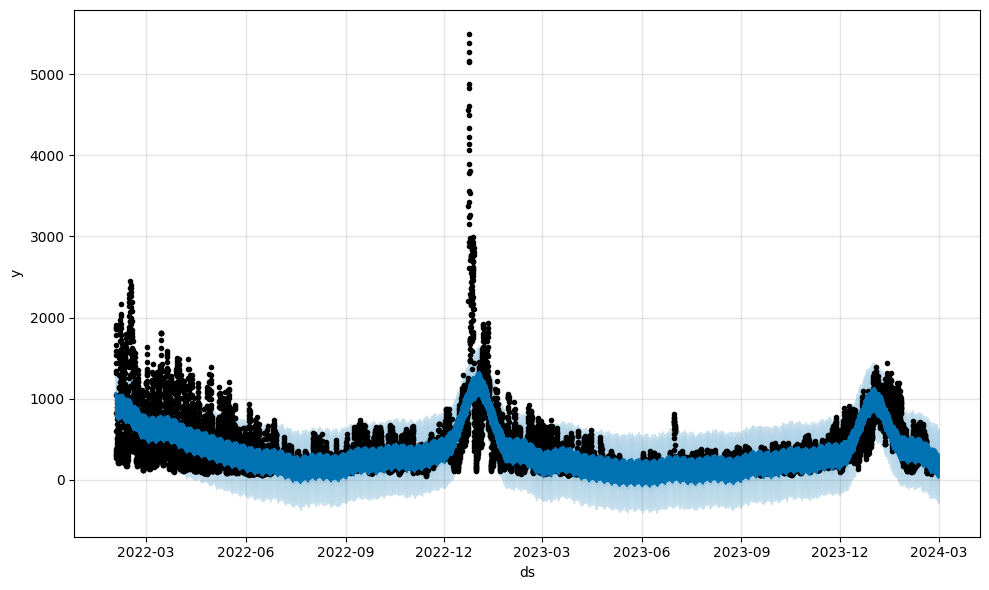

In [12]:
fig1 = m.plot(forecast)

C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Se

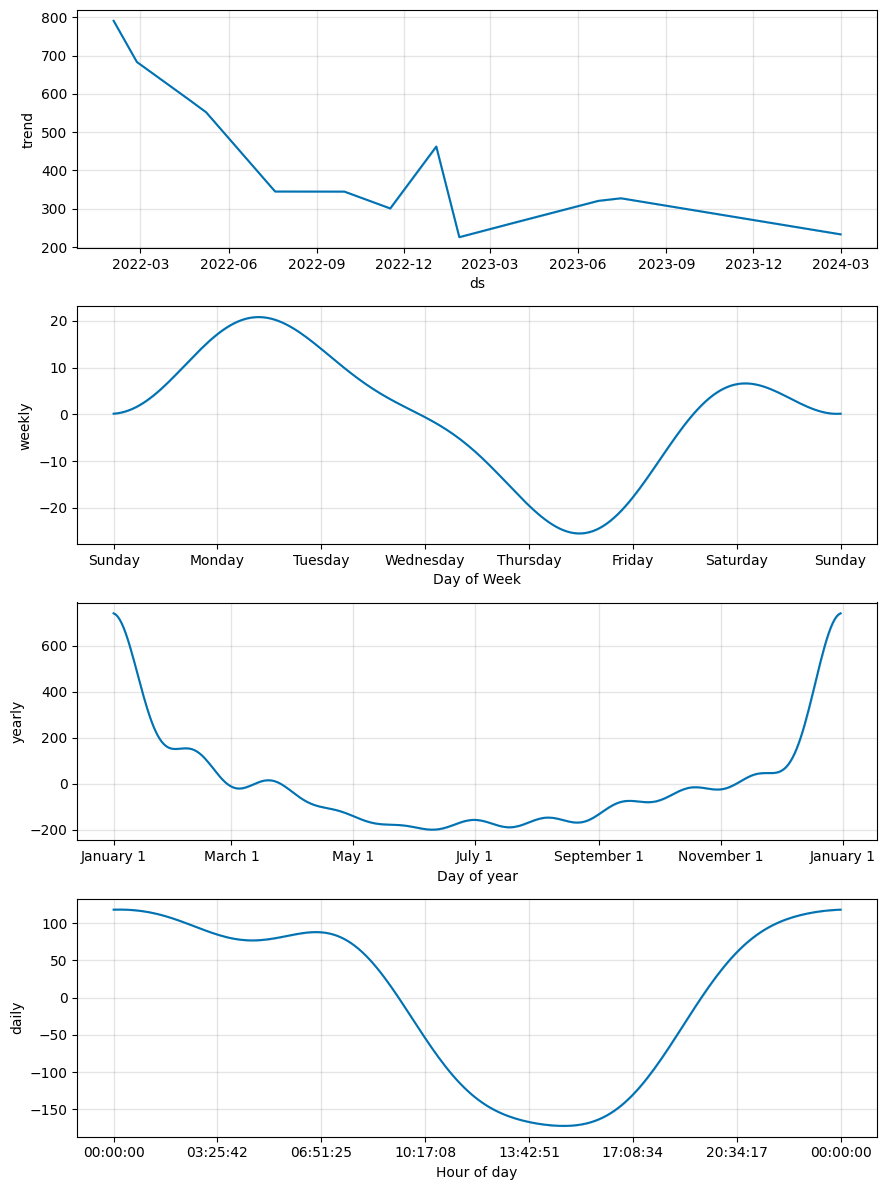

In [13]:
fig2 = m.plot_components(forecast)

In [14]:
predicted = forecast[-168:]

In [15]:
((y['y']-predicted['yhat'])**2).mean()**0.5

94.09104266220027

## Non Stationary

In [16]:
m = Prophet(interval_width=0.95)
m.fit(X)

22:51:08 - cmdstanpy - INFO - Chain [1] start processing
22:51:19 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
future = m.make_future_dataframe(periods=7*24, freq='H')
future.tail()

C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


,ds
18211,2024-02-29 19:00:00
18212,2024-02-29 20:00:00
18213,2024-02-29 21:00:00
18214,2024-02-29 22:00:00
18215,2024-02-29 23:00:00


In [18]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
18211,2024-02-29 19:00:00,172.208090,-298.765726,657.330148
18212,2024-02-29 20:00:00,231.571753,-210.680373,694.828919
18213,2024-02-29 21:00:00,275.315395,-190.422522,718.655142
18214,2024-02-29 22:00:00,300.921458,-175.646034,772.535429
18215,2024-02-29 23:00:00,313.696124,-192.357544,786.180463


<Axes: xlabel='ds'>

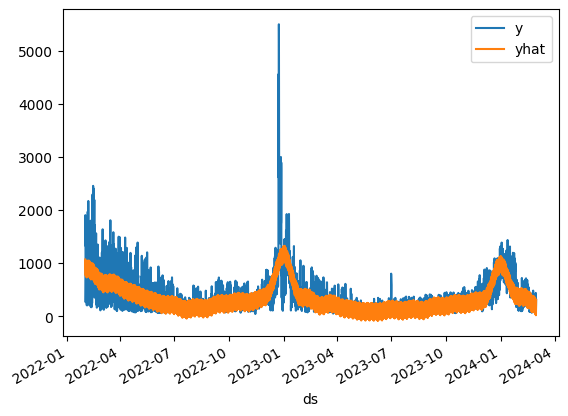

In [19]:
pd.concat([data.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()

In [20]:
((y['y']-predicted['yhat'])**2).mean()**0.5

94.09104266220027

## Multiplicative

In [21]:
m = Prophet(interval_width=0.95, seasonality_mode='multiplicative')
m.fit(X)

22:51:43 - cmdstanpy - INFO - Chain [1] start processing
22:51:55 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
future = m.make_future_dataframe(periods=7*24, freq='H')
future.tail()

C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


,ds
18211,2024-02-29 19:00:00
18212,2024-02-29 20:00:00
18213,2024-02-29 21:00:00
18214,2024-02-29 22:00:00
18215,2024-02-29 23:00:00


In [23]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
18211,2024-02-29 19:00:00,181.828412,-253.401504,572.738557
18212,2024-02-29 20:00:00,247.603607,-177.969590,679.455093
18213,2024-02-29 21:00:00,298.192346,-147.235731,724.272313
18214,2024-02-29 22:00:00,332.510157,-106.668394,804.697902
18215,2024-02-29 23:00:00,357.817630,-47.865409,784.633960


<Axes: xlabel='ds'>

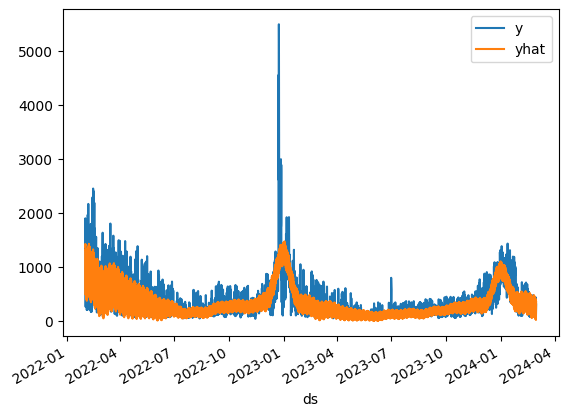

In [24]:
pd.concat([data.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()

In [25]:
((data['y']-forecast['yhat'])**2).mean()**0.5

221.89022615266077

In [26]:
from prophet.diagnostics import cross_validation,  performance_metrics
cv_results = cross_validation( model = m, initial = '600 days', horizon = '30 days')
df_p = performance_metrics(cv_results)
df_p

  0%|          | 0/9 [00:00<?, ?it/s]

22:52:35 - cmdstanpy - INFO - Chain [1] start processing
22:52:39 - cmdstanpy - INFO - Chain [1] done processing
22:52:42 - cmdstanpy - INFO - Chain [1] start processing
22:52:47 - cmdstanpy - INFO - Chain [1] done processing
22:52:49 - cmdstanpy - INFO - Chain [1] start processing
22:53:07 - cmdstanpy - INFO - Chain [1] done processing
22:53:10 - cmdstanpy - INFO - Chain [1] start processing
22:53:19 - cmdstanpy - INFO - Chain [1] done processing
22:53:22 - cmdstanpy - INFO - Chain [1] start processing
22:53:40 - cmdstanpy - INFO - Chain [1] done processing
22:53:44 - cmdstanpy - INFO - Chain [1] start processing
22:53:53 - cmdstanpy - INFO - Chain [1] done processing
22:53:56 - cmdstanpy - INFO - Chain [1] start processing
22:54:19 - cmdstanpy - INFO - Chain [1] done processing
22:54:22 - cmdstanpy - INFO - Chain [1] start processing
22:54:40 - cmdstanpy - INFO - Chain [1] done processing
22:54:44 - cmdstanpy - INFO - Chain [1] start processing
22:55:07 - cmdstanpy - INFO - Chain [1]

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days 00:00:00,29339.356350,171.287350,123.800496,0.279563,0.234718,0.288077,0.967593
1,3 days 01:00:00,29045.777950,170.428219,123.379603,0.278429,0.233709,0.287187,0.969136
2,3 days 02:00:00,28824.829752,169.778767,122.874740,0.277021,0.230841,0.286066,0.969136
3,3 days 03:00:00,28659.152178,169.290142,122.231781,0.274906,0.228351,0.284313,0.969136
4,3 days 04:00:00,28506.188092,168.837757,121.604671,0.272569,0.223736,0.282528,0.969136
...,...,...,...,...,...,...,...,...
644,29 days 20:00:00,82142.603004,286.605309,205.794239,0.533554,0.412205,0.546410,0.867284
645,29 days 21:00:00,82258.238953,286.806972,205.559771,0.531551,0.411847,0.545167,0.867284
646,29 days 22:00:00,82231.425986,286.760224,205.091418,0.528870,0.411133,0.543579,0.865741
647,29 days 23:00:00,82068.432884,286.475885,204.435634,0.525670,0.410135,0.541785,0.864198
